<h1 align="center">Connecting to SQL Databases with Python<h1>

Instructions to install the pymssql package can be found here:
    <a href = "https://docs.microsoft.com/en-us/sql/connect/python/pymssql/step-3-proof-of-concept-connecting-to-sql-using-pymssql"> https://docs.microsoft.com/en-us/sql/connect/python/pymssql/step-3-proof-of-concept-connecting-to-sql-using-pymssql</a>

In [1]:
import pymssql  
conn = pymssql.connect(server = 'bg-mrs-train-15', database = 'nyctaxi')

In [35]:
import pandas as pd
query = "SELECT TOP 10000 * FROM nyctaxi_sample"
taxi = pd.read_sql(query,conn)

In [36]:
taxi.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,tip_amount,tipped,tip_class
0,C6F86DFD1C85EEFBFC234FCB953E1D4B,79C37DA10EA88D6B467F9FA2B29F8006,CMT,1,N,2013-11-17 12:26:45,2013-11-17 12:32:02,1,316,0.8,...,40.754913,CSH,5.5,0.0,0.5,0.0,6.0,0.0,0,0
1,C8B42D06B8961C18CE435A51FE6A3C0B,59A32B69453C9E2EAAFC4C822A914DC9,CMT,1,N,2013-11-20 06:33:57,2013-11-20 06:38:47,1,289,0.8,...,40.763477,CSH,5.5,0.0,0.5,0.0,6.0,0.0,0,0
2,C291E4F982CE74F51D4C388CD2595B80,3BD04BB028B2145779C0D3F6DD42ACD6,CMT,1,N,2013-12-21 12:57:03,2013-12-21 13:02:26,1,322,0.8,...,40.757526,CSH,5.5,0.0,0.5,0.0,6.0,0.0,0,0
3,C2B9067BB92017120FEF9865217E5E53,7D2921FDCC869190E736D3B731C66DC5,CMT,1,N,2013-12-08 11:09:52,2013-12-08 11:14:13,1,260,0.8,...,40.736359,CSH,5.5,0.0,0.5,0.0,6.0,0.0,0,0
4,BF0445196F40892C2E39501333833245,0B071535952183F132EB38B643E2252E,CMT,1,N,2013-10-21 10:58:58,2013-10-21 11:03:50,1,291,0.8,...,40.780495,CSH,5.5,0.0,0.5,0.0,6.0,0.0,0,0


In [37]:
taxi.dropna().describe()

,passenger_count,trip_time_in_secs,trip_distance,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,tip_amount,tipped,tip_class
count,10000.0,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.0,10000.0,10000.0
mean,1.0,754.340500,2.176643,10.857100,0.0,0.5,0.0,11.357538,0.0,0.0,0.0
std,0.0,557.454178,2.334040,7.199532,0.0,0.0,0.0,7.200100,0.0,0.0,0.0
min,1.0,0.000000,0.000000,2.500000,0.0,0.5,0.0,3.000000,0.0,0.0,0.0
25%,1.0,346.000000,0.800000,6.000000,0.0,0.5,0.0,6.500000,0.0,0.0,0.0
50%,1.0,601.000000,1.500000,9.000000,0.0,0.5,0.0,9.500000,0.0,0.0,0.0
75%,1.0,1063.000000,2.600000,13.500000,0.0,0.5,0.0,14.000000,0.0,0.0,0.0
max,1.0,10800.000000,24.600000,68.000000,0.0,0.5,0.0,68.500000,0.0,0.0,0.0


In [38]:
taxi.groupby(['vendor_id']).sum()

,passenger_count,trip_time_in_secs,trip_distance,fare_amount,surcharge,mta_tax,tolls_amount,total_amount,tip_amount,tipped,tip_class
vendor_id,,,,,,,,,,,
CMT,8838,5833405,16635.00,85774.0,0.0,4419.0,0.0,90193.00,0.0,0,0
VTS,1162,1710000,5131.43,22797.0,0.0,581.0,0.0,23382.38,0.0,0,0


In [33]:
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])

## Plotting with matplotlib

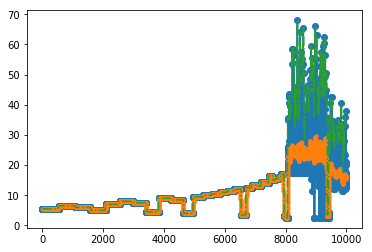

In [40]:
import matplotlib.pyplot as plt
rollingfare = taxi['fare_amount'].rolling(30, center = True)

plt.plot(taxi['fare_amount'],'o-', label = 'Fare Amount')
plt.plot(rollingfare.mean(),'.', label = '30-day Rolling Mean')
plt.plot(rollingfare.max(),'-.', label = '30-dat Rolling Max')
plt.show()
#data.plot(style=['-','--',':']).show()
#ax.lines[0].set_alpha(0.7)

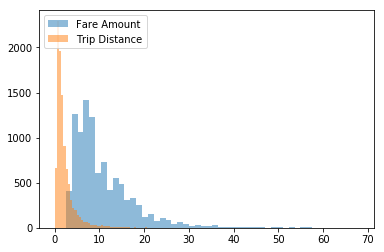

In [45]:
# Set an alpha and use the same bins since we are plotting two hists
plt.hist(taxi['fare_amount'], bins=50, alpha=0.5, label='Fare Amount') 
plt.hist(taxi['trip_distance'], bins=50, alpha=0.5, label='Trip Distance')
plt.legend(loc='upper left'); #Place the lengend in the top left
plt.show() #Show the plot

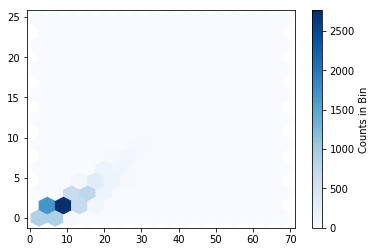

In [43]:
plt.hexbin(taxi['fare_amount'], taxi['trip_distance'], gridsize=15, cmap='Blues')
plt.colorbar(label='Counts in Bin')
plt.show()

## Machine Learning with matplotlib

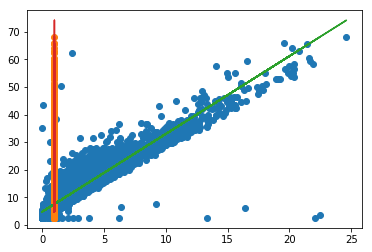

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#X = taxi[['passenger_count', 'trip_time_in_secs', 'trip_distance', 'surcharge', 'mta_tax', 'tolls_amount', 'tip_amount']]
X = taxi[['trip_distance', 'passenger_count']]
y = taxi['fare_amount']
model.fit(X, y)

X_fit = X
y_fit = model.predict(X_fit)
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);
plt.show()